# MATH 360 - Modelling Assignment 1

Ethan, Josh, Sai, Aaryan

In [1]:
import numpy as np
import scipy as psi
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


**Problem Statement**

What is the mass of each greenhouse gas in the atmosphere over time

**Variables + Parameters**
| Description                                   | Symbol         | Dimensions   | Type                  |
|-----------------------------------------------|----------------|--------------|-----------------------|
| Time                                          | $t$            | $T$          | independent variable  |
| Mass of Carbon Dioxide                        | $M_1$          | $M$          | dependent variable    |
| Mass of Water Vapour                          | $M_2$          | $M$          | dependent variable    |
| Mass of Methane                               | $M_3$          | $M$          | dependent variable    |
| Mass of Nitrous Oxide                         | $M_4$          | $M$          | dependent variable    |
| Volume of Atmosphere                          | $V_0$          | $L^3$        | parameter             |
| Greenhouse gas flow rate from wetlands        | $Q_1$     | $L^3 T^{-1}$ | parameter     |
| Greenhouse gas flow rate from volcanoes       | $Q_2$     | $L^3 T^{-1}$ | parameter     |
| Greenhouse gas flow rate to/from ocean        | $Q_3$       | $L^3 T^{-1}$ | parameter     |
| Water vapour flow rate by evaporation          | $Q_4$ | $L^3 T^{-1}$ | parameter     |
| Water vapour flow rate by precipitation            | $Q_5$       | $L^3 T^{-1}$ | parameter     |
| Photosynthesis rate by forest growth            | $Q_6$       | $L^3 T^{-1}$ | parameter     |
| Reaction coefficient ($\mathrm{CH}_4$ oxidation) | $k$          | $(NL^{-3})^{-2}T^{-1}$ | parameter  |
| Molar mass of $CO_2$                      | $m_1$          | $MN^{-1}$    | parameter             |
| Molar mass of $H_2O$                       | $m_2$          | $MN^{-1}$    | parameter             |
| Molar mass of $CH_4$                       | $m_3$          | $MN^{-1}$    | parameter             |
|  Molar concentration of $CH_4$             | $C_3$          | $NL^{-3}$    | parameter             |
| Molar concentration of $O_2$               | $C_5$          | $NL^{-3}$    | parameter             |
| Molar concentration of $CO_2$              | $C_1$          | $NL^{-3}$    | parameter             |
| Molar concentration of $H_2O$              | $C_2$          | $NL^{-3}$    | parameter             |
| Initial concentration of Carbon Dioxide       | $c_1$          | $M$          | parameter             |
| Initial concentration of Water Vapour         | $c_2$          | $M$          | parameter             |
| Initial concentration of Methane              | $c_3$          | $M$          | parameter             |
| Initial concentration of Nitrous Oxide        | $c_4$          | $M$          | parameter             |


**Assumptions and Constraints**
- Consider the entire Earth's atmosphere as a closed tank with constant volume $V_0$
- The flows from each source or sink $Q_1, \dots ,Q_6$ is always constant
- The rate of precipitation and evaporation is the same for water vapour, $Q_4 = Q_5$ $^1$ 
- The methane reaction rate $k$ is constant. 
- The methane reaction rate $k$ constant, is very small, close to zero.
- Oxygen ($O_2$) concentration remains constant (treated as an unlimited reservoir).
- All parameters are constant in time (no seasonal or trend forcing).
- Initial concentrations $c_1,...,c_4$ are known.

**Building Solutions**


**Methane Reaction**

Now we are given that the reaction $CH_4 + 2O_2 \rightarrow CO_2 + 2H_2O$ occurs in the atmosphere. By using the **law of mass action** we can model this as follows:


$$CH_4 + 2O_2 \xrightarrow{k} CO_2 + 2H_2O$$


Where $k$ is the reaction coefficient. Thus we can write the rate of change of each due to this reaction as follows:

\begin{align*}
\frac{d[CH_4]}{dt}  = -k [CH_4][O_2]^2 \quad
\frac{d[O_2]}{dt}  = -2k [CH_4][O_2]^2 \quad
\frac{d[CO_2]}{dt}  = k [CH_4][O_2]^2 \quad 
\frac{d[H_2O]}{dt}  = 2k [CH_4][O_2]^2 \quad
\end{align*}



The **law of conservation of mass** states that the mass of a closed system does not change. This implies that mass cannot be created or destroyed. Conservation of mass implies the balance equation for an open system:


\begin{align*}
\frac{dM_1}{dt}
&= \frac{M_1\,Q_2}{V_0}
 + \frac{M_1\,Q_1}{V_0}
 + k\,C_3\,C_5^{2}\, V_0 \, m_1
 - \frac{M_1\,Q_3}{V_0}
 - \frac{M_1\,Q_6}{V_0} \\
%
\frac{dM_2}{dt}
&= \frac{M_2\,Q_2}{V_0}
 + \frac{M_2\,Q_4}{V_0}
 + 2k\,C_3\,C_5^{2}\, V_0 \, m_2
 - \frac{M_2\,Q_5}{V_0}\\
%
\frac{dM_3}{dt}
&= \frac{M_3\,Q_1}{V_0}
 - k\,C_3\,C_5^{2}\, V_0 \, m_3 \\
%
\frac{dM_4}{dt}
&= \frac{M_4\,Q_1}{V_0}
 - \frac{M_4\,Q_3}{V_0}\, .
\end{align*}


with the intial conditions:

\begin{aligned}
M_1(0) &= c_1,\quad
M_2(0) &= c_2,\quad
M_3(0) &= c_3,\quad
M_4(0) &= c_4.
\end{aligned}


**Nondimensionalization**

Substitute in

\begin{aligned}
t &= [t]\,t^*,\quad
M_1 &= M^*_1 [M_1],\quad
M_2 &= M^*_2 [M_2],\quad
M_3 &= M^*_3 [M_3],\quad
M_4 &= M^*_4 [M_4],
\end{aligned}

and dividing by the derivative factor for each equation, we have:


\begin{aligned}
\frac{dM^*_1}{dt^*} &= \frac{M^*_1[t]}{V_0}(Q_1 + Q_2 - Q_3 - Q_6) + \frac{[t]}{[M_1]} k\,C_3 C_5^{2}\,V_0\, m_1\\[2pt]
\frac{dM^*_2}{dt^*} &= \frac{M^*_2[t]}{V_0}Q_2  + \frac{[t]}{[M_2]} 2k\,C_3 C_5^{2}\,V_0\, m_2\\[2pt]
\frac{dM^*_3}{dt^*} &= \frac{M^*_3Q_1[t]}{V_0} - \frac{[t]}{[M_3]} k\,C_3 C_5^{2}\,V_0\, m_3,\\[2pt]
\frac{dM^*_4}{dt^*} &= \frac{M^*_4 [t]}{V_0}(Q_1 - Q_3)
\end{aligned}

with initial conditions

\begin{aligned}
M_1^*(0)&=\frac{c_1}{[M_1]}, \quad
M_2^*(0)&=\frac{c_2}{[M_2]},\quad
M_3^*(0)&=\frac{c_3}{[M_3]},\quad
M_4^*(0)&=\frac{c_4}{[M_4]}.
\end{aligned}


Pick the scaling factors

\begin{aligned}
[t] = \frac{V_0}{Q_2}, \quad
[M_1] = c_1 \quad
[M_2] = c_2 \quad
[M_3] = c_3 \quad
[M_4] = c_4
\end{aligned}

with these choices, let:

\begin{aligned}
&\tau = \frac{[t]Q_2}{V_0} = 1,\\
&\alpha_1 = \frac{Q_1}{Q_2}, \quad 
\alpha_2 = \frac{Q_3}{Q_2},\quad
\alpha_3 = \frac{Q_6}{Q_2}, \\
&D_1 = \frac{V^2_0}{Q_2c_1}k C_3 C_5^{2} m_1, \quad
D_2 = \frac{2V^2_0}{Q_2c_2}k C_3 C_5^{2} m_2,\quad
D_3 = \frac{V^2_0}{Q_2c_3}k C_3 C_5^{2} m_3.
\end{aligned}

The final model is then 

\begin{aligned}
\frac{dM^*_1}{dt^*} &= M^*_1(1 + \alpha_1 - \alpha_2 - \alpha_3) + D_1\\[2pt]
\frac{dM^*_2}{dt^*} &= M^*_2 + D_2\\[2pt]
\frac{dM^*_3}{dt^*} &= M^*_3\alpha_1 - D_3\\[2pt]
\frac{dM^*_4}{dt^*} &= M^*_4(\alpha_1 - \alpha_2)\\
\end{aligned}

with intial conditions

\begin{aligned}
M_1^*(0)=1, \quad
M_2^*(0)=1, \quad
M_3^*(0)=1, \quad
M_4^*(0)=1.
\end{aligned}


In [84]:
alpha1 = 2 # Q1/Q2 
alpha2 = 0.4 # Q3/Q2
alpha3 = 0.6 # Q6/Q2

D1 = 0.5
D2 = 0
D3 = 0.6

In [85]:
def f(u, t, alpha2):
    M1, M2, M3, M4 = u
    dM1 = M1*(1 + alpha1 - alpha2 - alpha3) + D1
    dM2 = M2 + D2
    dM3 = M3*(alpha1) - D3
    dM4 = M4*(alpha1 - alpha2)
    return [dM1, dM2, dM3, dM4]

In [86]:
u0 = np.array([1.0, 1.0, 1.0, 1.0])
t0, t1 = 0.0, 10.0
t_eval = np.linspace(t0, t1, 400)

sol = psi.integrate.odeint(f, u0, t_eval, args=(alpha2,))

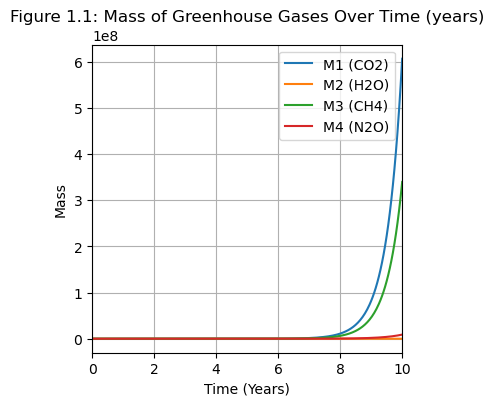

In [87]:
plt.figure(figsize=(4, 4))
labels = ['M1 (CO2)', 'M2 (H2O)', 'M3 (CH4)', 'M4 (N2O)']

for i in range(sol.shape[1]):
    plt.plot(t_eval, sol[:, i], label=labels[i])

plt.xlim((0,10))
plt.xlabel('Time (Years)')
plt.ylabel('Mass')
plt.title('Figure 1.1: Mass of Greenhouse Gases Over Time (years)')
plt.legend()
plt.grid()
plt.show()

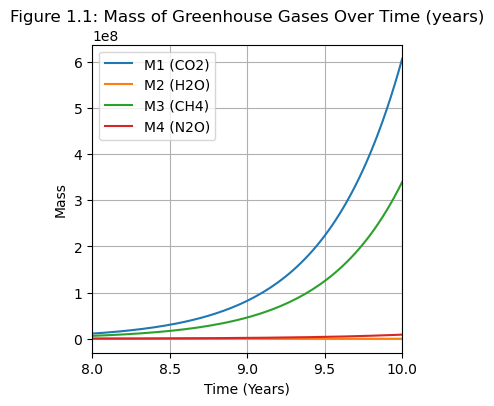

In [ ]:
plt.figure(figsize=(4, 4))
labels = ['M1 (CO2)', 'M2 (H2O)', 'M3 (CH4)', 'M4 (N2O)']

for i in range(sol.shape[1]):
    plt.plot(t_eval, sol[:, i], label=labels[i])

plt.xlim((8,10))
plt.xlabel('Time (Years)')
plt.ylabel('Mass')
plt.title('Figure 1.2: Mass of Greenhouse Gases Over Time (years)')
plt.legend()
plt.grid()
plt.show()

**Analyze and Assess**

**Does our solution make sense?**

Figure 1.1 shows the plot for each greenhouse gas over time. It shows that $CO_2, CH_4,$ and, $N_2O$ become the most abundant greenhouse gases in the atmosphere overtime. Our model is supported by outside research which says that $CO_2, CH_4,$ and, $N_2O$ make up $79.7\%, 11.1\%,$ and, $6.1\%$ of greenhouse gas emissions in 2022 respectively. $^2$ What this means is that we are able to answer our problem statement with this model.

**$\alpha_2$ values**

Our alpha values have a strong relationship to the overall shape of the model, specifically $\alpha_2$ which is the ratio of the absorbtion from the ocean $Q_3$ over the addition from volcanoe eruptions $Q_2$. We can see in Figures 2.0, 2.1, and, 2.2 how the model changes based on different values of $\alpha_2$. Figure 2.2 shows that if  $\alpha_2$ is too large, the amount of $CO_2$ will go to zero over time. Our research shoes that the rate of flow from volcanoes $^3$ is almost always larger than the rate from the ocean $^4$ meaning that this scenario is unlikely to happen.

**Analysis of Assumptions**

Our model has some strong assumptions, specifically that the flow rate of each process is constant, in reality these rates are also dependent on outside conditions like for example, human pollution. Another assumption we have is that the rate of precipitation is equal the rate of evaporation for water vapour, this is making it so that $H_2O$ is also increasing over time at an exponential rate.

Overall, our solutions make sense, each differential equation has an exponential solution, which is expected, and $CO_2, CH4,$ and, $N_2O$ make up the most greenhouse gases in the atmosphere over time.


**Bibliography**

[1] Earle, S. (n.d.). *11.1 the hydrologic cycle*. Environmental Geology. https://environmental-geology-dev.pressbooks.tru.ca/chapter/the-hydrological-cycle/

[2] Environmental Protection Agency. (n.d.).  Overview of Greenhouse Gases . EPA. https://www.epa.gov/ghgemissions/overview-greenhouse-gases 

[3] Galetto, F. (2023, March 6). *Quantification of subaerial volcanism and its products*. Eos. https://eos.org/editors-vox/quantification-of-subaerial-volcanism-and-its-products 

[4] Wanninkhof, R. (2014). *Relationship between wind speed and gas exchange over the ocean revisited*. Limnology and Oceanography: Methods, 12(6), 351–362. https://doi.org/10.4319/lom.2014.12.351 